## Two Stage Cluster Analysis

* The cluster analysis performed in two phases: 1) Ward Method, and 2) K-Means Method.
* Data used in cluster analysis is the level of importance of each attribute of every individual. Ward method can interpret the optimal number of clusters of input data from the dendogram image formed .
* The second stage is to implement  the K-means Method to determine the members of each cluster.

* Hierarchical methods, like Ward’s minimum variance method, can determine the candidate number of clusters and starting point that non-hierarchical methods, like the K-means method, need, while non-hierarchical methods can provide better performance with the specified information.


### Conjoint Analysis -Basic Idea
* Humans evaluate the overall desirability of a complex product or service based on a function of the value of its separate parts (Orme, 2005).  



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
plt.style.use = 'default'

%matplotlib inline

In [2]:
pref_data = pd.read_csv('partworth.csv')
pref_data.head()

,Respondents / Attributes and Levels,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,...,Very mild,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted
0,6861,0,8,12,0,16,23,8,0,10,...,0,0,21,13,4,0,11,9,0,13
1,4129,1,4,0,8,0,51,8,0,4,...,2,2,6,0,0,12,10,13,5,0
2,4393,19,0,15,16,0,3,31,0,20,...,13,6,0,8,0,4,8,1,5,0
3,445,0,17,19,0,19,21,0,12,1,...,11,0,14,17,0,0,12,0,1,9
4,7393,20,0,4,9,3,0,0,0,11,...,6,9,0,23,17,0,8,0,6,3


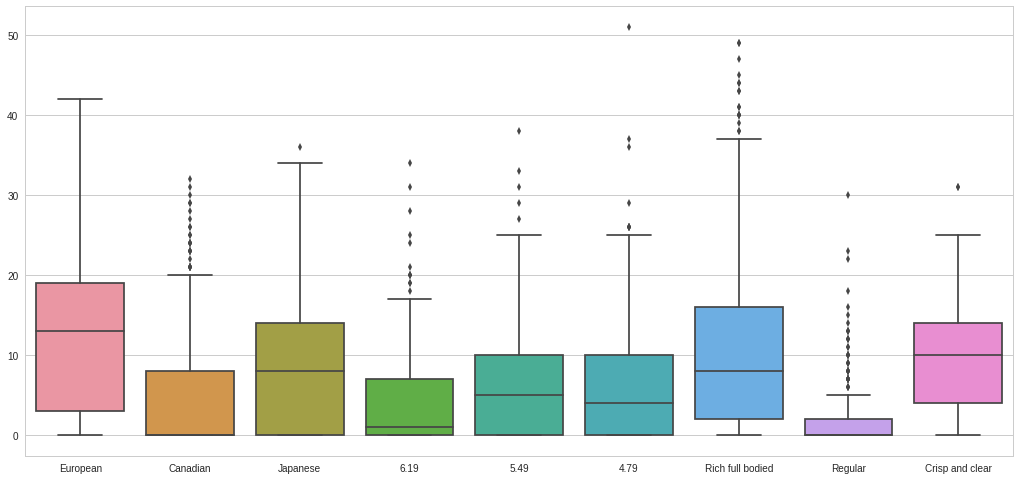

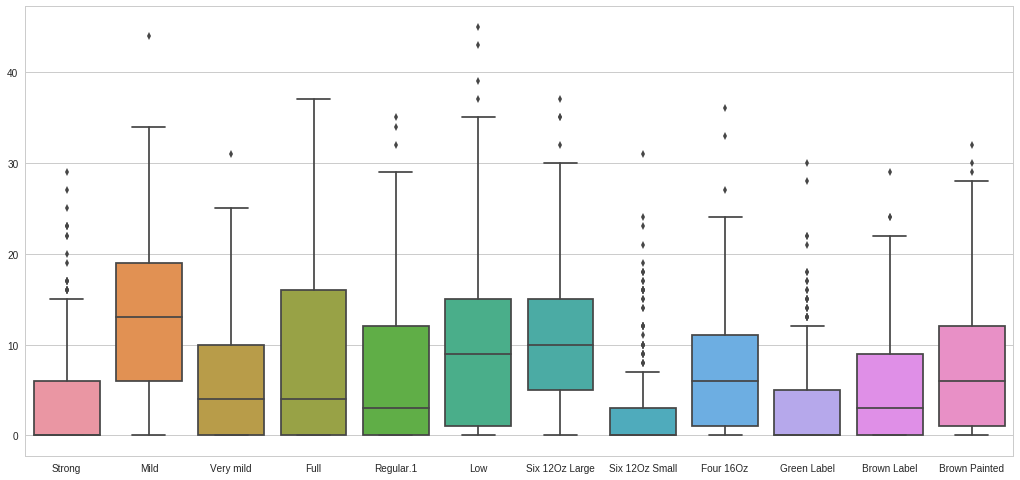

In [3]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(17.7, 8.27)

fig2, ax2 = plt.subplots()

# the size of A4 paper
fig2.set_size_inches(17.7, 8.27)

sns.boxplot(data=pref_data.loc[:,'European':'Crisp and clear'],ax = ax1)

sns.boxplot(data=pref_data.loc[:,'Strong':],ax = ax2)



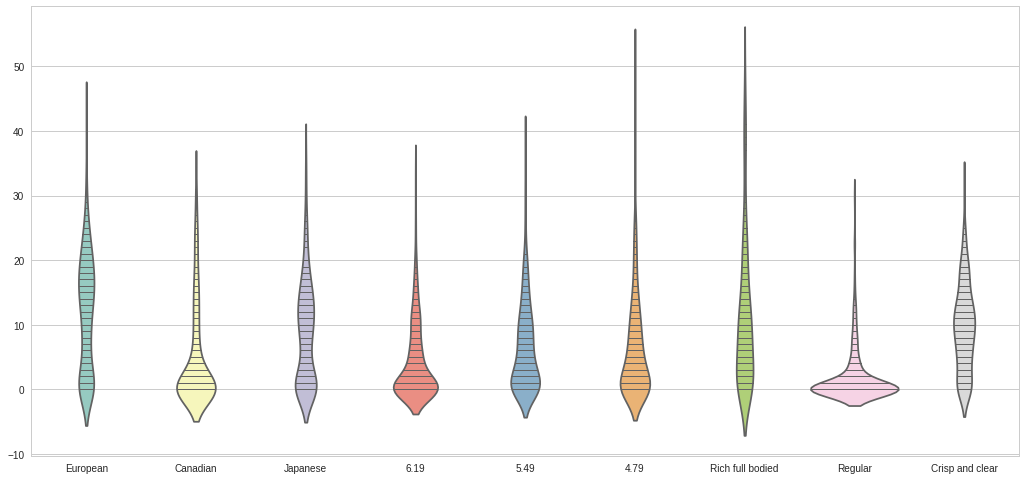

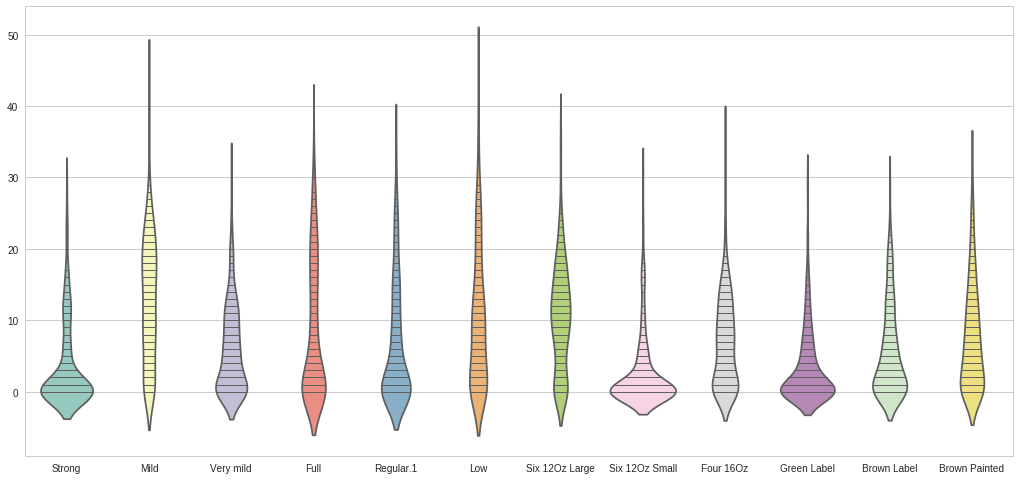

In [4]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(17.7, 8.27)

fig4, ax4 = plt.subplots()
fig4.set_size_inches(17.7, 8.27)

sns.violinplot(data=pref_data.loc[:,'European':'Crisp and clear'],ax = ax3, inner="stick", palette="Set3");

sns.violinplot(data=pref_data.loc[:,'Strong':],ax = ax4, inner="stick", palette="Set3");

## Observation from the above Violin Plots :
*

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
data = pref_data.loc[:,'European':]

In [7]:
z = linkage(data, 'ward')

In [8]:
type(z)

numpy.ndarray

In [9]:
z.shape


(316, 4)

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(z, pdist(data))
c

0.4362374376408672

### Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

In [11]:
z[0]

#hence first row number 74 and 114 were clustered together

array([  74.        ,  114.        ,    7.54983444,    2.        ])

In [12]:
z[:20]

array([[  74.        ,  114.        ,    7.54983444,    2.        ],
       [   3.        ,  216.        ,    8.06225775,    2.        ],
       [   4.        ,  208.        ,    8.66025404,    2.        ],
       [ 159.        ,  163.        ,    9.21954446,    2.        ],
       [ 295.        ,  307.        ,    9.64365076,    2.        ],
       [ 259.        ,  269.        ,    9.69535971,    2.        ],
       [ 152.        ,  219.        ,    9.74679434,    2.        ],
       [  17.        ,  265.        ,    9.79795897,    2.        ],
       [  83.        ,  166.        ,    9.94987437,    2.        ],
       [  31.        ,  158.        ,   10.        ,    2.        ],
       [ 167.        ,  317.        ,   10.2794293 ,    3.        ],
       [  99.        ,  225.        ,   10.34408043,    2.        ],
       [ 256.        ,  262.        ,   10.72380529,    2.        ],
       [ 266.        ,  320.        ,   10.96965511,    3.        ],
       [  79.        ,  180.      

### Till iteration 10, it simply merged two original samples. After that...

*Note - in 10th iteration, 317 corresponds to cluster formed in z[0], hence merge iteration 11 merges 167 with to our sample 74 and 114 which were merged in 1st iteration.

Lets look at the three 

In [13]:
data.iloc[[74,114,167]]

# Hence, it makes sense because all three seem very similar in terms of preferences

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Very mild,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted
74,15,0,16,0,7,14,4,0,9,0,...,7,22,4,0,13,0,6,3,0,2
114,14,0,14,0,6,12,4,0,11,0,...,11,19,2,0,15,0,5,3,0,2
167,14,0,11,0,10,11,5,0,10,0,...,14,24,1,0,14,0,4,2,0,3


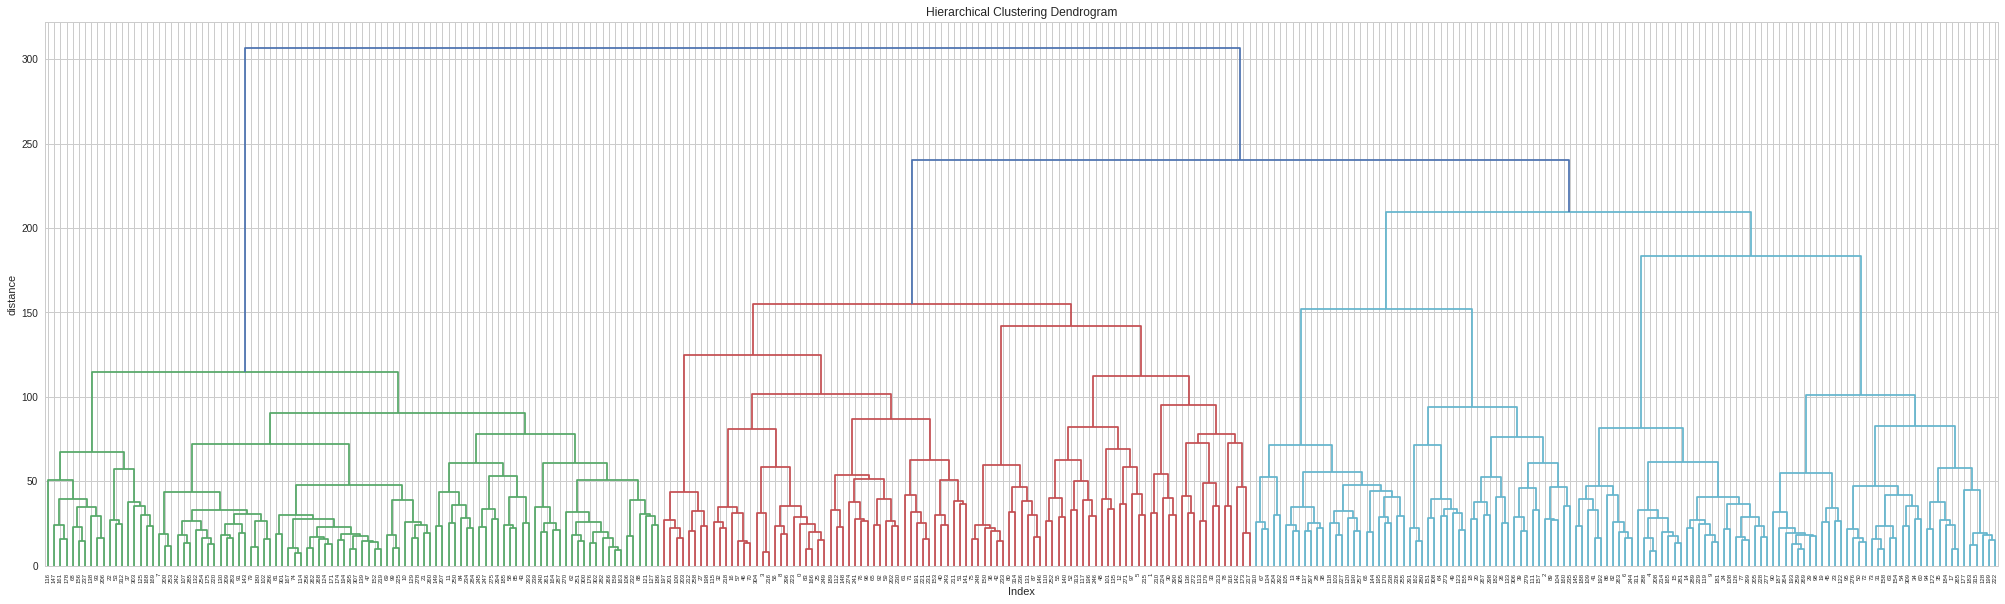

In [14]:
# calculate full dendrogram
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('distance')
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=6.,  # font size for the x axis labels
)


plt.show()

In [15]:
z[-30:]

#LARGE distance jumps / gaps in the dendrogram are pretty interesting for us. 
#They indicate that something is merged here, that maybe just shouldn't be merged. 
#In other words: maybe the things that were merged here really don't belong to the same cluster, 
#telling us that maybe there's just 2 clusters here.

array([[ 582.        ,  592.        ,   67.49917695,   18.        ],
       [ 553.        ,  595.        ,   69.08388621,    8.        ],
       [ 585.        ,  591.        ,   71.2023876 ,   25.        ],
       [ 417.        ,  554.        ,   71.30798392,   10.        ],
       [ 568.        ,  578.        ,   71.80913811,   45.        ],
       [ 561.        ,  579.        ,   72.92429212,    7.        ],
       [ 534.        ,  572.        ,   72.9497544 ,    5.        ],
       [ 586.        ,  598.        ,   76.01800981,   17.        ],
       [ 597.        ,  599.        ,   77.81353938,   37.        ],
       [ 608.        ,  609.        ,   77.84737816,   12.        ],
       [ 529.        ,  594.        ,   81.0176657 ,   19.        ],
       [ 575.        ,  600.        ,   81.36496761,   32.        ],
       [ 601.        ,  604.        ,   81.90616144,   17.        ],
       [ 576.        ,  593.        ,   82.84530224,   25.        ],
       [ 588.        ,  602.      

In [16]:
## THe change from 124 to 141 is a jump big enough to be considered.
# Or we can also truncate the tree on the jump of 154 to 183 (if we want less specific clusters) 

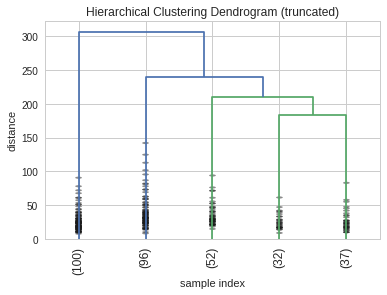

In [17]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
      # plot a horizontal cut-off line
)
plt.show()

In [18]:
## REtrieving the clusters
from scipy.cluster.hierarchy import fcluster

k=5
cluster_number = fcluster(z, k, criterion='maxclust')

In [19]:
type(cluster_number) , cluster_number.shape

(numpy.ndarray, (317,))

In [20]:
cluster_number

array([2, 2, 3, 2, 4, 2, 4, 1, 2, 4, 1, 1, 2, 3, 4, 4, 2, 5, 3, 5, 3, 1, 1,
       5, 4, 2, 3, 2, 3, 5, 2, 5, 2, 2, 5, 5, 2, 1, 3, 3, 2, 4, 2, 1, 3, 5,
       2, 1, 2, 3, 5, 2, 2, 1, 5, 2, 2, 2, 1, 2, 5, 2, 1, 5, 3, 2, 3, 3, 1,
       1, 2, 2, 5, 5, 1, 2, 2, 4, 2, 1, 2, 1, 4, 2, 1, 1, 4, 2, 1, 3, 5, 1,
       2, 1, 5, 5, 2, 2, 5, 1, 2, 2, 1, 3, 3, 3, 1, 1, 4, 4, 2, 3, 2, 2, 1,
       2, 1, 2, 3, 4, 3, 1, 5, 3, 1, 1, 4, 1, 5, 1, 1, 2, 1, 3, 3, 2, 2, 3,
       1, 1, 2, 2, 2, 1, 3, 4, 2, 1, 2, 1, 2, 3, 1, 2, 5, 3, 1, 3, 5, 1, 3,
       1, 3, 1, 1, 4, 2, 1, 1, 1, 3, 1, 5, 2, 1, 1, 1, 5, 1, 2, 1, 4, 3, 5,
       5, 1, 1, 5, 4, 2, 3, 2, 4, 5, 1, 3, 2, 2, 2, 5, 1, 2, 2, 2, 3, 4, 1,
       1, 4, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 2, 5, 2, 2, 1, 3, 3, 4, 4,
       2, 2, 1, 2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 4, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 3, 1, 3, 2, 5, 1, 1, 1, 4, 5, 5, 1, 3, 1, 5, 1, 2, 2, 3, 2, 1,
       5, 4, 1, 3, 3, 4, 1, 1, 1, 1, 1, 1, 4, 4, 2, 3, 3, 1, 1, 1, 2, 3, 3,
       4, 1,

## Lets look at the samples in different clusters and check whether they make sense or not.

In [21]:
# Appending the column 'cluster_number' to existing dataframe

data['cluster_number'] = pd.Series(cluster_number, index=data.index)

In [22]:
data.head()

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted,cluster_number
0,0,8,12,0,16,23,8,0,10,10,...,0,21,13,4,0,11,9,0,13,2
1,1,4,0,8,0,51,8,0,4,6,...,2,6,0,0,12,10,13,5,0,2
2,19,0,15,16,0,3,31,0,20,0,...,6,0,8,0,4,8,1,5,0,3
3,0,17,19,0,19,21,0,12,1,0,...,0,14,17,0,0,12,0,1,9,2
4,20,0,4,9,3,0,0,0,11,0,...,9,0,23,17,0,8,0,6,3,4


In [23]:
## GRoupby cluster number

grouped = data.groupby('cluster_number')
grouped.get_group(1).head()

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted,cluster_number
7,18,1,0,2,3,0,7,0,13,0,...,26,7,0,19,0,1,0,1,9,1
10,21,0,17,0,4,4,4,2,0,0,...,31,10,0,15,8,0,4,9,0,1
11,6,0,8,1,0,10,0,3,1,0,...,26,3,0,18,1,0,15,2,0,1
21,20,0,16,0,9,5,12,0,3,0,...,30,2,0,9,0,7,2,0,1,1
22,20,12,0,15,10,0,3,0,5,0,...,4,10,0,11,3,0,4,0,6,1


In [24]:
grouped.get_group(4).head()

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted,cluster_number
4,20,0,4,9,3,0,0,0,11,0,...,9,0,23,17,0,8,0,6,3,4
6,1,5,0,0,3,4,9,0,24,0,...,0,11,35,15,0,15,0,1,8,4
9,17,5,0,9,3,0,17,0,13,0,...,1,0,25,13,0,11,0,5,5,4
14,15,6,0,0,3,1,19,0,16,0,...,0,6,24,18,1,0,0,11,8,4
15,13,5,0,12,13,0,0,1,4,0,...,2,0,30,22,0,16,0,5,5,4


### Lets find out the cluster center as mean of each of the five clusters formed above in Heirarchial Clustering

In [25]:
def find_cluster_mean(cluster_number):
    cluster_x_data = grouped.get_group(cluster_number)
    cluster_x_mean = cluster_x_data.apply(np.sum, axis = 0)/len(cluster_x_data)
    return cluster_x_mean
    

In [26]:
cluster_means = pd.Series()
for i in range(1,6):
    cluster_x_mean = find_cluster_mean(i)
    cluster_means['cluster_' + str(i)+'_mean'] = cluster_x_mean
    

In [27]:
## cluster_means is a series with cluster__number_mean as index 

In [28]:
type(cluster_means['cluster_5_mean']), cluster_means['cluster_5_mean']

(pandas.core.series.Series, European            15.864865
 Canadian             0.729730
 Japanese            10.864865
 6.19                 1.540541
 5.49                 9.729730
 4.79                 4.027027
 Rich full bodied     4.486486
 Regular              1.540541
 Crisp and clear      8.621622
 Strong               3.189189
 Mild                 8.918919
 Very mild            1.783784
 Full                 0.891892
 Regular.1           16.621622
 Low                 11.783784
 Six 12Oz Large      12.783784
 Six 12Oz Small       1.837838
 Four 16Oz            3.081081
 Green Label          0.000000
 Brown Label         14.513514
 Brown Painted       19.378378
 cluster_number       5.000000
 dtype: float64)

In [29]:
mean_df = pd.DataFrame({1:cluster_means['cluster_1_mean'],2:cluster_means['cluster_2_mean'],3:cluster_means['cluster_3_mean'],4:cluster_means['cluster_4_mean'],5:cluster_means['cluster_5_mean']})


mean_df

,1,2,3,4,5
European,14.82,5.010417,14.961538,11.53125,15.864865
Canadian,0.98,12.895833,1.750000,3.06250,0.729730
Japanese,9.84,6.760417,12.423077,2.93750,10.864865
6.19,3.15,4.385417,6.711538,6.34375,1.540541
5.49,3.48,9.677083,3.788462,7.06250,9.729730
4.79,4.31,11.791667,3.461538,2.31250,4.027027
Rich full bodied,9.69,6.489583,27.307692,9.81250,4.486486
Regular,0.70,4.125000,0.519231,0.40625,1.540541
Crisp and clear,12.52,6.427083,7.903846,13.65625,8.621622
Strong,1.90,6.416667,3.730769,0.40625,3.189189


In [30]:
#REarranging the column names so that levels of a particular attribute are together

cols = ['European','Canadian','Japanese','6.19','5.49','4.79','Rich full bodied','Regular','Crisp and clear','Strong','Mild','Very mild','Full','Regular','Low','Six 12Oz Large','Six 12Oz Small','Four 16Oz','Green Label','Brown Label','Brown Painted',
]
mean_df = mean_df.T[cols]

In [31]:
mean_df

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Very mild,Full,Regular,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted
1,14.820000,0.980000,9.840000,3.150000,3.480000,4.310000,9.690000,0.700000,12.520000,1.900000,...,6.540000,19.510000,0.700000,6.230000,13.040000,0.710000,5.640000,3.790000,2.990000,3.560000
2,5.010417,12.895833,6.760417,4.385417,9.677083,11.791667,6.489583,4.125000,6.427083,6.416667,...,6.416667,3.375000,4.125000,10.166667,6.697917,5.354167,9.979167,5.177083,4.791667,8.562500
3,14.961538,1.750000,12.423077,6.711538,3.788462,3.461538,27.307692,0.519231,7.903846,3.730769,...,5.326923,4.788462,0.519231,7.096154,7.807692,2.884615,5.903846,2.365385,6.269231,7.346154
4,11.531250,3.062500,2.937500,6.343750,7.062500,2.312500,9.812500,0.406250,13.656250,0.406250,...,7.843750,3.625000,0.406250,25.750000,14.968750,0.218750,7.718750,1.750000,5.031250,3.937500
5,15.864865,0.729730,10.864865,1.540541,9.729730,4.027027,4.486486,1.540541,8.621622,3.189189,...,1.783784,0.891892,1.540541,11.783784,12.783784,1.837838,3.081081,0.000000,14.513514,19.378378


## Lets look at mean of all levels of attributes among different clusters

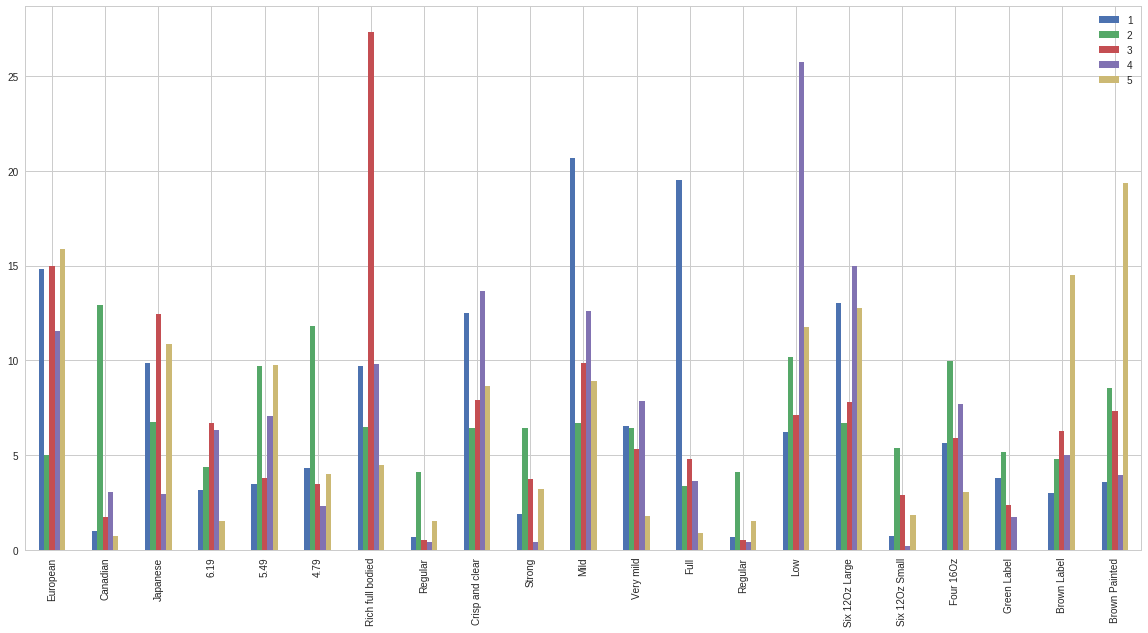

In [32]:
mean_df.T.plot(kind = 'bar',figsize = (20,10))

## Applying K-means to get more accurate clusters 
* Now that we know number of clusters and where to initialize the cluster centeres approximately, we can now apply k-means clustering to get more meaningful clusters.


In [33]:
from sklearn.cluster import KMeans

In [34]:
cluster_centers = np.array(mean_df)
cluster_centers.shape

(5, 21)

In [35]:
# Number of clusters
kmeans = KMeans(n_clusters=5, init = cluster_centers)


In [36]:
# Fitting the input data

pref_data = pref_data.loc[:,'European':]

kmeans = kmeans.fit(pref_data)
# Getting the cluster labels
labels = kmeans.predict(pref_data)
# Centroid values
centroids = kmeans.cluster_centers_

/home/prateek-01/anaconda3/envs/ml/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [37]:
# Cluster labels from k-means
labels = labels +1
print(labels , type(labels), labels.shape)

[2 2 3 2 4 5 4 1 2 4 1 1 2 3 4 4 2 5 4 5 4 1 1 5 4 2 5 2 3 5 2 5 2 2 5 5 2
 1 3 5 2 4 2 4 3 5 2 1 2 5 5 2 4 1 5 4 2 2 1 2 5 5 1 5 1 2 3 3 1 1 2 2 5 5
 1 2 2 1 2 1 2 1 4 2 1 1 4 2 1 3 5 1 2 1 5 5 2 4 5 1 3 2 1 3 3 3 1 1 4 4 4
 3 2 2 1 2 5 4 3 4 3 1 5 1 1 4 1 1 5 1 1 2 1 2 3 2 2 3 1 1 4 5 5 1 3 4 2 1
 2 1 2 3 1 5 5 5 1 3 5 1 3 1 5 1 1 4 2 1 2 2 3 1 5 5 1 1 1 5 1 3 1 4 2 5 5
 1 1 5 4 2 3 5 4 5 1 3 2 2 2 5 1 2 2 3 3 4 1 1 4 1 2 2 1 2 4 5 2 5 2 1 1 5
 5 2 2 1 3 3 4 4 2 2 1 2 1 3 3 1 3 1 1 2 1 2 4 1 2 1 2 2 1 1 4 1 1 3 1 3 1
 5 1 1 1 4 5 5 1 3 1 5 3 2 2 3 2 1 5 4 1 3 3 4 1 1 1 1 1 1 4 4 2 5 2 1 1 1
 2 3 5 4 1 1 1 4 2 2 3 1 1 5 3 4 4 2 4 5 1] <class 'numpy.ndarray'> (317,)


In [38]:
#Cluster labels from Heirarchial clustering performed earlier
cluster_number, type(cluster_number), cluster_number.shape

(array([2, 2, 3, 2, 4, 2, 4, 1, 2, 4, 1, 1, 2, 3, 4, 4, 2, 5, 3, 5, 3, 1, 1,
        5, 4, 2, 3, 2, 3, 5, 2, 5, 2, 2, 5, 5, 2, 1, 3, 3, 2, 4, 2, 1, 3, 5,
        2, 1, 2, 3, 5, 2, 2, 1, 5, 2, 2, 2, 1, 2, 5, 2, 1, 5, 3, 2, 3, 3, 1,
        1, 2, 2, 5, 5, 1, 2, 2, 4, 2, 1, 2, 1, 4, 2, 1, 1, 4, 2, 1, 3, 5, 1,
        2, 1, 5, 5, 2, 2, 5, 1, 2, 2, 1, 3, 3, 3, 1, 1, 4, 4, 2, 3, 2, 2, 1,
        2, 1, 2, 3, 4, 3, 1, 5, 3, 1, 1, 4, 1, 5, 1, 1, 2, 1, 3, 3, 2, 2, 3,
        1, 1, 2, 2, 2, 1, 3, 4, 2, 1, 2, 1, 2, 3, 1, 2, 5, 3, 1, 3, 5, 1, 3,
        1, 3, 1, 1, 4, 2, 1, 1, 1, 3, 1, 5, 2, 1, 1, 1, 5, 1, 2, 1, 4, 3, 5,
        5, 1, 1, 5, 4, 2, 3, 2, 4, 5, 1, 3, 2, 2, 2, 5, 1, 2, 2, 2, 3, 4, 1,
        1, 4, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 2, 5, 2, 2, 1, 3, 3, 4, 4,
        2, 2, 1, 2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 4, 1, 2, 1, 2, 2, 1, 1, 2,
        1, 1, 3, 1, 3, 2, 5, 1, 1, 1, 4, 5, 5, 1, 3, 1, 5, 1, 2, 2, 3, 2, 1,
        5, 4, 1, 3, 3, 4, 1, 1, 1, 1, 1, 1, 4, 4, 2, 3, 3, 1, 1, 1, 2, 3, 3,

In [39]:
#Lets see how many labels are different among the two

similar = pd.Series(labels == cluster_number)
similar.value_counts()

# So cluster assignments of 50 respondents have changed.

True     267
False     50
dtype: int64

In [40]:
# Lets join the cluster labels to the original dataframe

pref_data['cluster'] = labels
pref_data_clustered = pref_data

pref_data_clustered.head()

,European,Canadian,Japanese,6.19,5.49,4.79,Rich full bodied,Regular,Crisp and clear,Strong,...,Full,Regular.1,Low,Six 12Oz Large,Six 12Oz Small,Four 16Oz,Green Label,Brown Label,Brown Painted,cluster
0,0,8,12,0,16,23,8,0,10,10,...,0,21,13,4,0,11,9,0,13,2
1,1,4,0,8,0,51,8,0,4,6,...,2,6,0,0,12,10,13,5,0,2
2,19,0,15,16,0,3,31,0,20,0,...,6,0,8,0,4,8,1,5,0,3
3,0,17,19,0,19,21,0,12,1,0,...,0,14,17,0,0,12,0,1,9,2
4,20,0,4,9,3,0,0,0,11,0,...,9,0,23,17,0,8,0,6,3,4


In [41]:
pref_data_clustered.to_csv('clustered_output.csv')

## Classification usinn Decision Trees

In [42]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer
0,2,5,4,5,1,4,3,4,3,4,4,3
1,9,6,7,3,1,4,4,3,4,3,4,3
2,6,4,6,6,1,4,4,4,4,4,4,4
3,24,5,7,5,2,3,2,4,3,4,3,4
4,2,2,3,5,2,3,3,3,3,3,2,3


In [43]:
#Adding cluster numbers calculated using clustering

customer_data['cluster number'] = pref_data_clustered['cluster']
customer_data.head()

,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer,cluster number
0,2,5,4,5,1,4,3,4,3,4,4,3,2
1,9,6,7,3,1,4,4,3,4,3,4,3,2
2,6,4,6,6,1,4,4,4,4,4,4,4,3
3,24,5,7,5,2,3,2,4,3,4,3,4,2
4,2,2,3,5,2,3,3,3,3,3,2,3,4


In [44]:
customer_data.to_csv('colab_data.csv')

In [45]:
df = pd.concat([customer_data,pd.get_dummies(customer_data['Sex (M=1)'], prefix='Female',drop_first = True)],axis=1)

df.head()

,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer,cluster number,Female_2
0,2,5,4,5,1,4,3,4,3,4,4,3,2,0
1,9,6,7,3,1,4,4,3,4,3,4,3,2,0
2,6,4,6,6,1,4,4,4,4,4,4,4,3,0
3,24,5,7,5,2,3,2,4,3,4,3,4,2,1
4,2,2,3,5,2,3,3,3,3,3,2,3,4,1


In [46]:
# now drop the original 'Sex' column (you don't need it anymore)
df.drop(['Sex (M=1)'],axis=1, inplace=True)

In [47]:
cols = df.columns.tolist()

cols

['Weekly consumption',
 'Age (1-7)',
 'Income (1-7)',
 'Education (1-6)',
 'Adapt to new situations',
 'Make friends easily',
 "Don't like to be tied to timetable",
 'Like to take chances',
 'Like to travel abroad',
 'Like ethnic food',
 'Knowledgeable about beer',
 'cluster number',
 'Female_2']

In [48]:
cols_updated = ['Weekly consumption',
 'Age (1-7)',
 'Income (1-7)',
 'Education (1-6)',
 'Female_2',
 'Adapt to new situations',
 'Make friends easily',
 "Don't like to be tied to timetable",
 'Like to take chances',
 'Like to travel abroad',
 'Like ethnic food',
 'Knowledgeable about beer',
  ]

In [49]:
df = df[cols_updated]

In [50]:
df_X = df[cols_updated]
df_X.head()

,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Female_2,Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer
0,2,5,4,5,0,4,3,4,3,4,4,3
1,9,6,7,3,0,4,4,3,4,3,4,3
2,6,4,6,6,0,4,4,4,4,4,4,4
3,24,5,7,5,1,3,2,4,3,4,3,4
4,2,2,3,5,1,3,3,3,3,3,2,3


In [51]:
df_Y = customer_data.loc[:,'cluster number']
df_Y.head()

0    2
1    2
2    3
3    2
4    4
Name: cluster number, dtype: int32

In [52]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.05, random_state=17)
 
clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth=6, min_samples_leaf=5,random_state=17)
clf.fit(X_train, y_train)
 
    
    



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [53]:
with open("decisionTree_classifier.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

In [54]:
# y_pred = clf.predict(X_test)
# print(classification_report(y_train, y_pred))
# print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))